## Importing the Dependencies

In [2]:
# benin_edatogo-dapaong_qc.ipynb

# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style('whitegrid')

## Import Libraries

In [4]:
import pandas as pd

## Load Dataset

Load the CSV and show the first 5 rows to verify data.

In [3]:
file_path = r"D:\KAIM\solar-challenge-week0\data\togo-dapaong_qc.csv"
df = pd.read_csv(file_path)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## Check Dataset Info

We check column types, non-null counts, and total rows to understand the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

## Count Missing Values
Identify which columns have missing data (NaNs).

In [7]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## Check Outliers (Example for GHI)
I compute Z-scores and flag values more than 3 standard deviations from the mean as outliers.

In [10]:
mean_ghi = df['GHI'].mean()
std_ghi = df['GHI'].std()
z_scores = (df['GHI'] - mean_ghi) / std_ghi
outliers_ghi = abs(z_scores) > 3
print("Number of GHI outliers:", outliers_ghi.sum())

Number of GHI outliers: 305


## Replace Outliers (All Columns)
We loop through all important columns, find outliers, and replace them with the column median.

In [22]:
# Columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Loop through each column
for col in columns_to_check:
    mean = df[col].mean()
    std = df[col].std()
    
    # Compute Z-scores
    z_scores = (df[col] - mean) / std
    outliers = abs(z_scores) > 3
    print(f"{col} outliers:", outliers.sum())
    
    # Replace outliers with the median of the column
    median_value = df[col].median()
    df.loc[outliers, col] = median_value

GHI outliers: 0
DNI outliers: 0
DHI outliers: 0
ModA outliers: 0
ModB outliers: 0
WS outliers: 0
WSgust outliers: 0


## Save Cleaned Dataset

In [25]:
df.to_csv(r'D:\KAIM\solar-challenge-week0\data\togo-dapaong_qc.csv', index=False)
print("Outliers replaced and file saved successfully!")


Outliers replaced and file saved successfully!


## Convert Timestamp to datetime

In [26]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Check the first few rows
df[['Timestamp']].head()


,Timestamp
0,2021-10-25 00:01:00
1,2021-10-25 00:02:00
2,2021-10-25 00:03:00
3,2021-10-25 00:04:00
4,2021-10-25 00:05:00


## Time Series Analysis
We’ll plot GHI, DNI, DHI, and Tamb over time to see patterns. We’ll start with line plots.

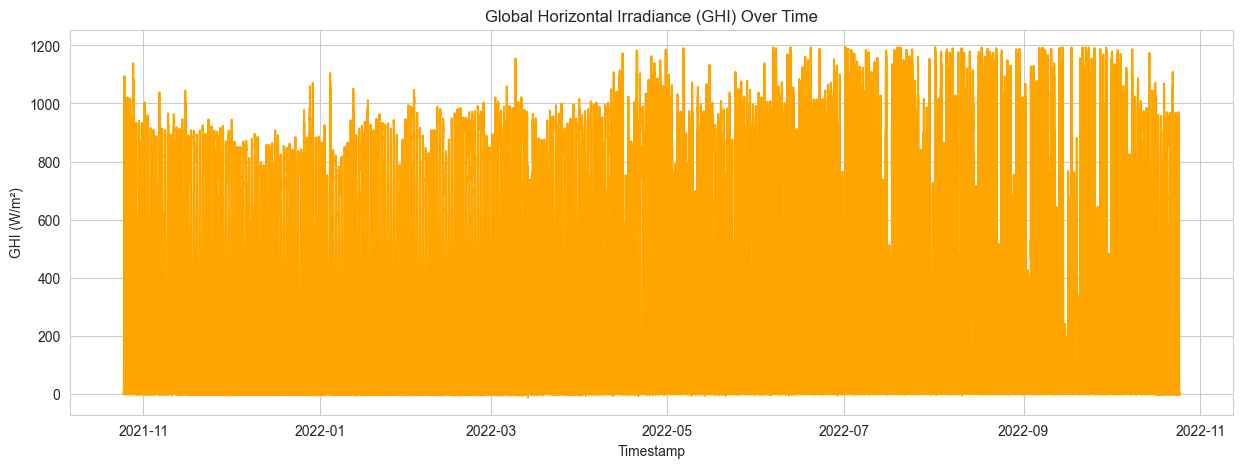

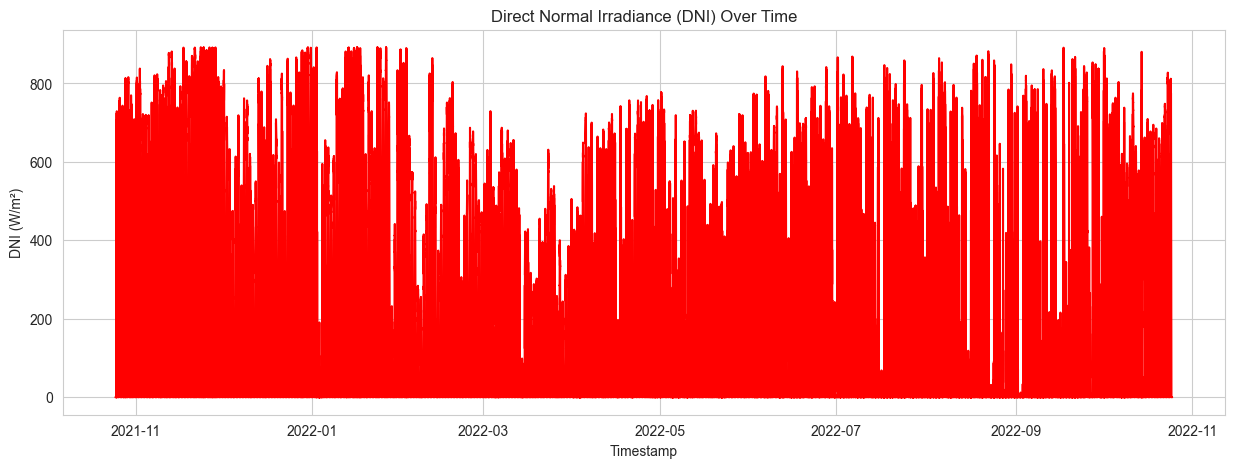

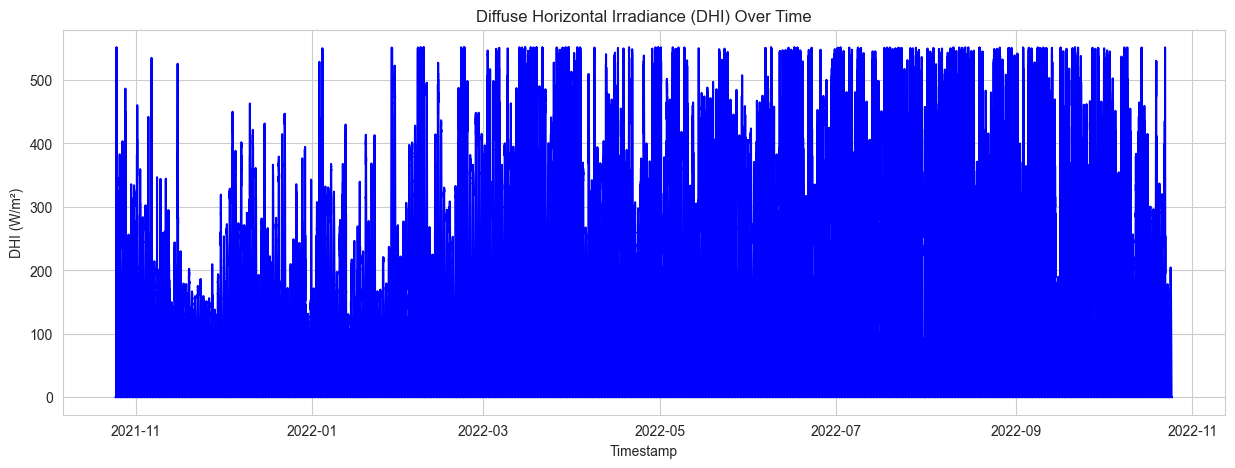

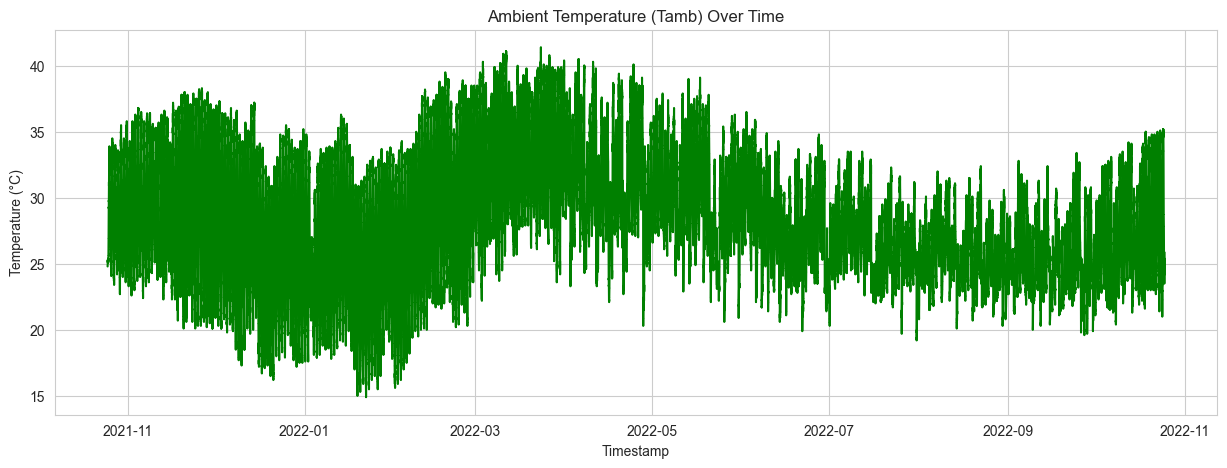

In [27]:
# Plot GHI over time
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# Plot DNI over time
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['DNI'], color='red')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.show()

# Plot DHI over time
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['DHI'], color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.show()

# Plot Ambient Temperature (Tamb) over time
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['Tamb'], color='green')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.show()


## Group by Cleaning flag and compute average
This shows if cleaning increases module efficiency (higher average readings)

In [31]:
# Group by Cleaning flag and calculate mean of ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)

                ModA        ModB
Cleaning                        
0         225.654941  218.926065
1         535.186477  532.211744


## Visualize the impact
This bar chart shows before vs after cleaning.

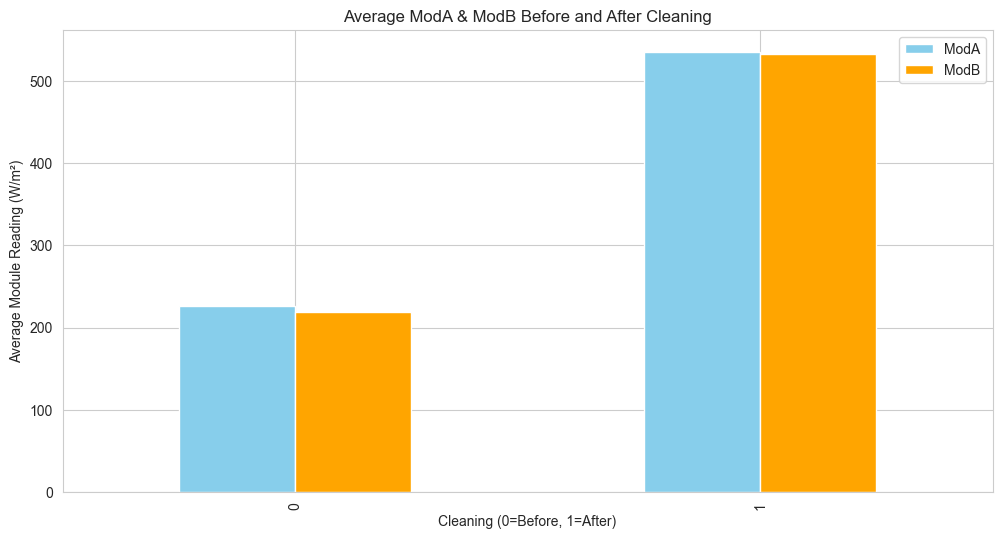

In [32]:
# Bar plot to compare ModA and ModB before and after cleaning
cleaning_impact.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average ModA & ModB Before and After Cleaning')
plt.xlabel('Cleaning (0=Before, 1=After)')
plt.ylabel('Average Module Reading (W/m²)')
plt.show()

## Heatmap of correlations
We’ll check correlations between GHI, DNI, DHI, TModA, TModB

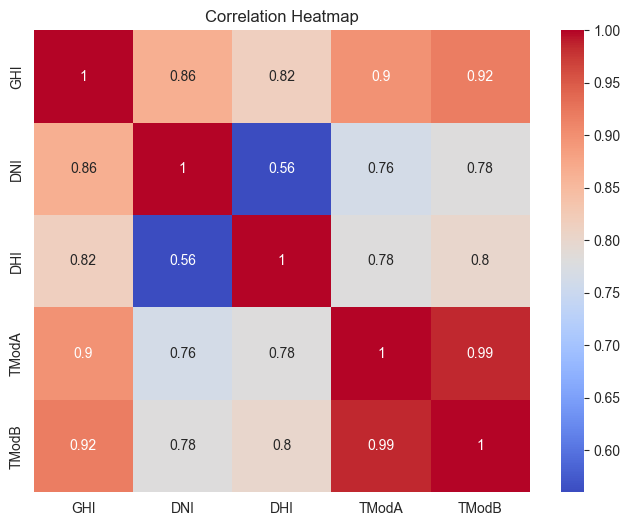

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Scatter plots
We can explore relationships between solar/wind variables and GHI.

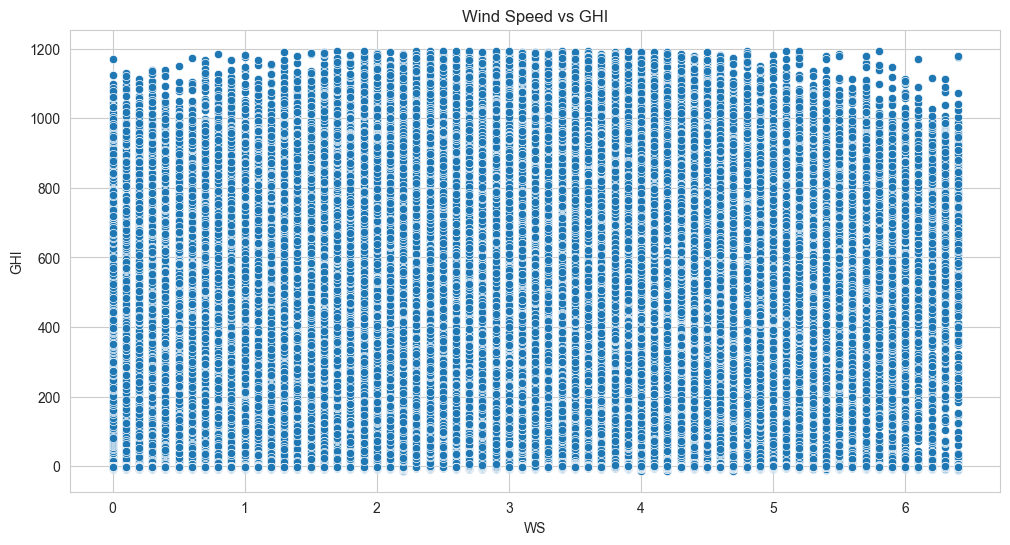

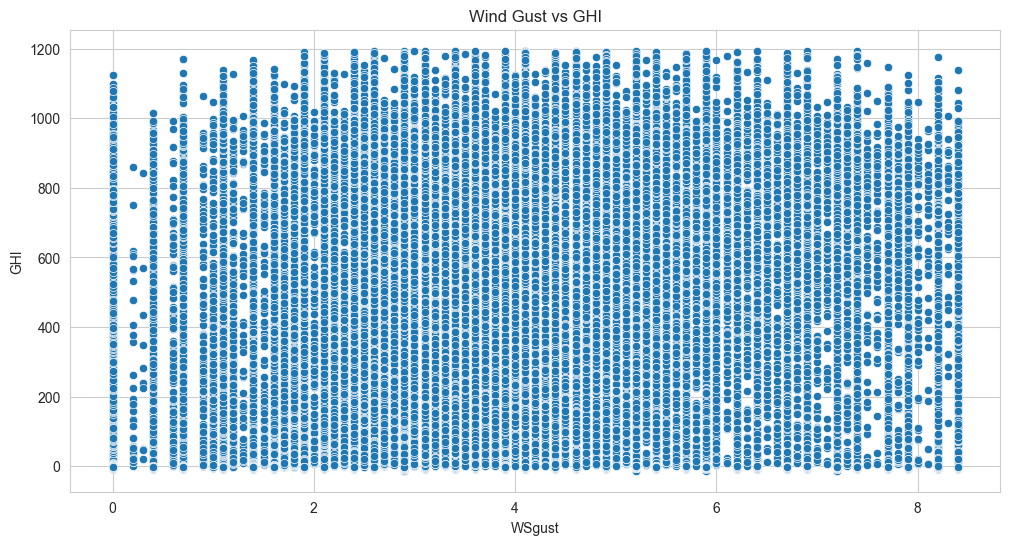

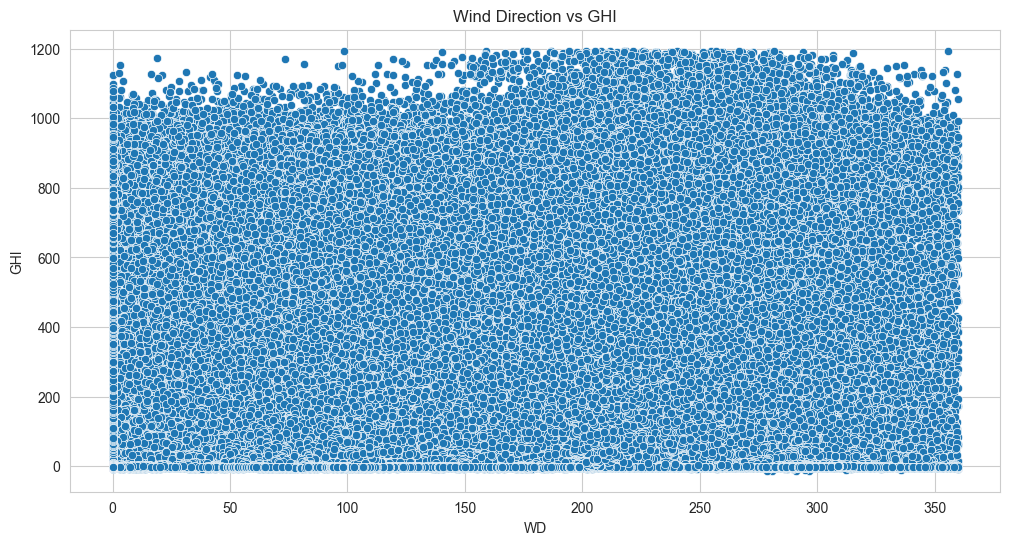

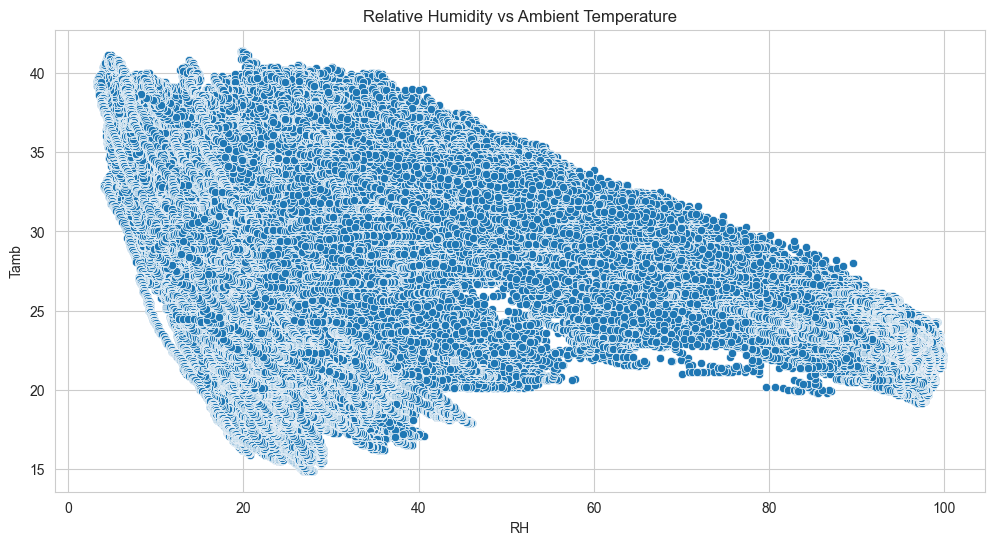

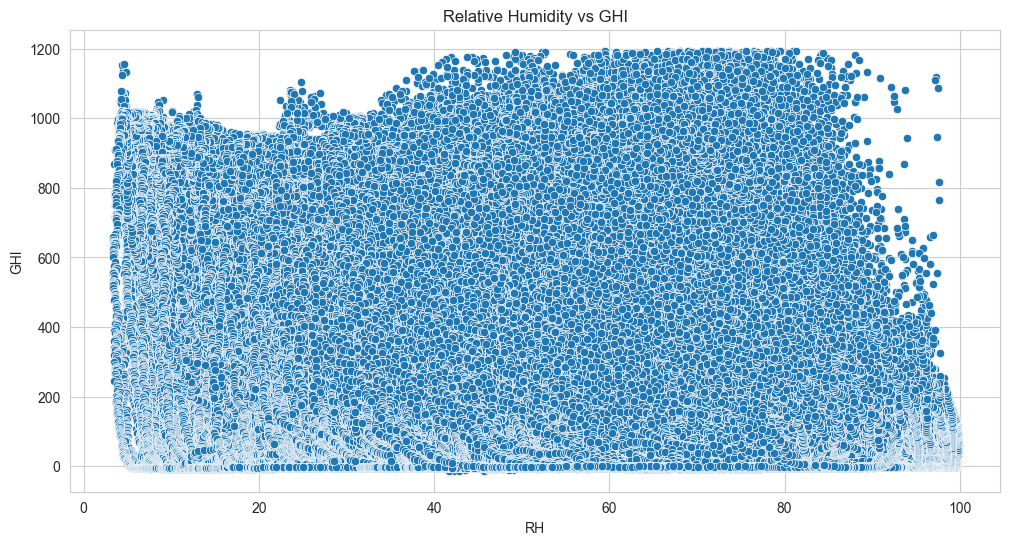

In [34]:
# Scatter: Wind vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed vs GHI')
plt.show()

sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('Wind Gust vs GHI')
plt.show()

sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('Wind Direction vs GHI')
plt.show()

# Scatter: RH vs Temperature & GHI
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs Ambient Temperature')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity vs GHI')
plt.show()

## : Wind Rose (Wind Speed & Direction)
This plot shows how wind direction and speed are distributed — useful for knowing where wind usually comes from

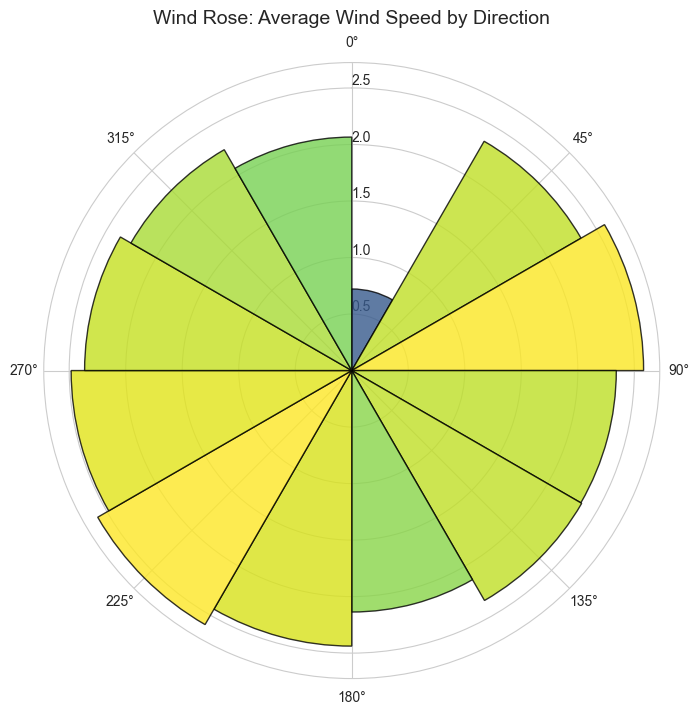

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = r"D:\KAIM\solar-challenge-week0\data\togo-dapaong_qc.csv"
df = pd.read_csv(file_path)

# Select wind direction (WD) and speed (WS) columns and drop any missing values
wind_data = df[['WD', 'WS']].dropna()

# Group wind directions into 30° bins
bins = np.arange(0, 361, 30)  # 0° to 360° every 30 degrees
wind_data['WD_bin'] = pd.cut(wind_data['WD'], bins=bins, include_lowest=True)

# Compute the average wind speed for each direction bin
wind_grouped = wind_data.groupby('WD_bin', observed=True)['WS'].mean().reset_index()

# Convert direction bins to angles (radians) for polar plot
theta = np.deg2rad(bins[:-1] + 15)  # midpoint of each bin
speeds = wind_grouped['WS']

# Create the wind rose polar plot
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, speeds, width=np.deg2rad(30), alpha=0.8,
              color=plt.cm.viridis(speeds / speeds.max()), edgecolor='black')

# Configure chart aesthetics
ax.set_theta_zero_location('N')      # 0° at the top (North)
ax.set_theta_direction(-1)           # clockwise
ax.set_title("Wind Rose: Average Wind Speed by Direction", va='bottom', fontsize=14)
ax.set_rlabel_position(0)
ax.grid(True)

plt.show()

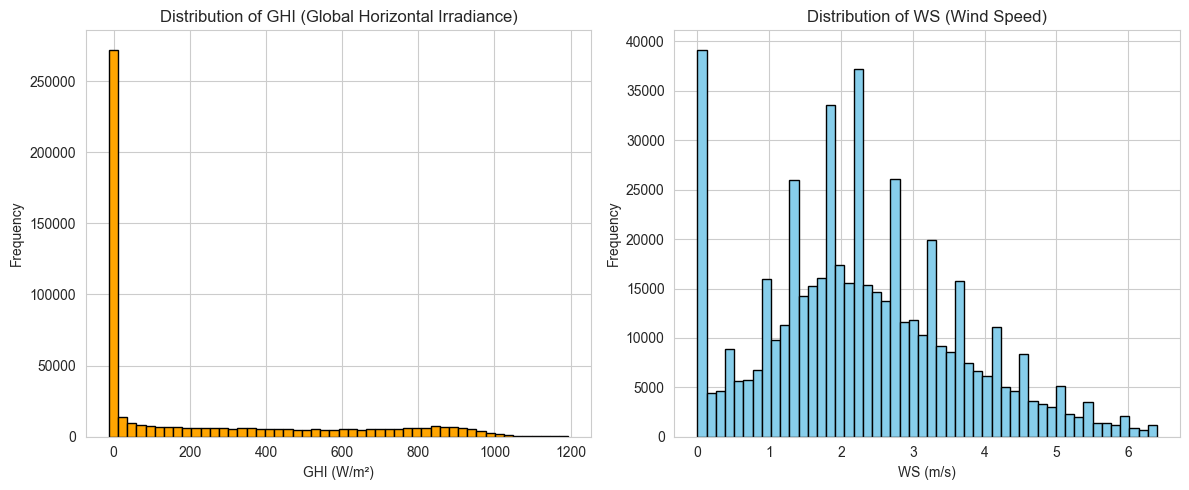

In [37]:
import matplotlib.pyplot as plt

# Create a figure with 2 side-by-side histograms
plt.figure(figsize=(12, 5))

# Histogram for GHI (solar radiation)
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of GHI (Global Horizontal Irradiance)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (wind speed)
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of WS (Wind Speed)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


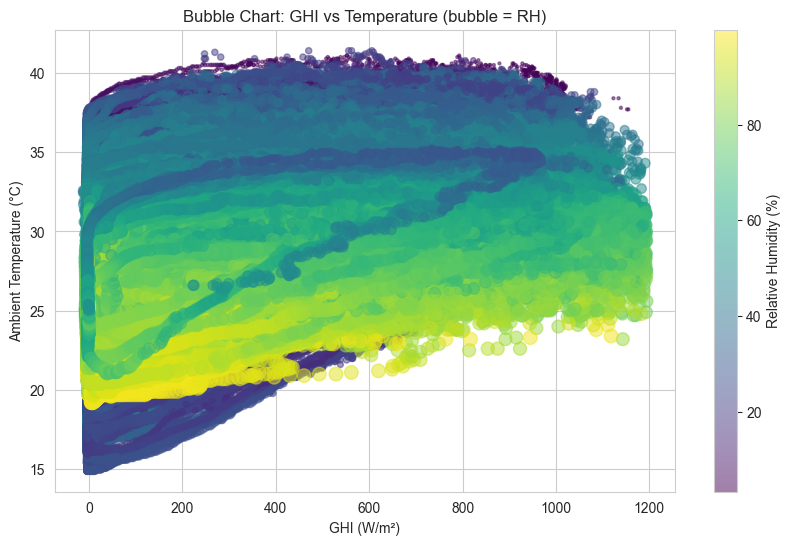

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Bubble chart: GHI vs Tamb, bubble size = RH
plt.scatter(df['GHI'], df['Tamb'], 
            s=df['RH'],          # bubble size = RH
            alpha=0.5,           # make bubbles slightly transparent
            c=df['RH'],          # bubble color = RH
            cmap='viridis')      # color map

plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs Temperature (bubble = RH)')
plt.show()


The bubble chart shows a clear relationship between ambient temperature and relative humidity. Cooler temperatures (11–20°C) correspond to moderate humidity (40–60%). As temperature rises to 20–27°C, humidity peaks at 80–100%, possibly due to daytime atmospheric moisture. In the hottest range (27–40°C), humidity decreases again to 40–60%, reflecting drier afternoon .